# DAA M06 Unsupervised learning

## Exercise 6.4 - K-means clustering of COVID dataset


## Purpose
The following code performs K-means clustering on COVID data.
Once you have read through the code, run it and inspected the output, you should try using different values of K and observe the differences in the clustering outcomes.

## References
The dataset that is used in this exercise was sourced from Our World in Data at https://ourworldindata.org/covid-cases.

This dataset was downloaded from the above link on 31 March 2021. It contains country-by-country data on confirmed coronavirus disease (COVID-19) cases and at the time of writing is updated on a daily basis.

The data contains COVID-19 and population related features for over 100 countries. These features include:
- total cases per million people;
- total new cases per million people;
- total deaths per million people;
- new deaths per million people;
- reproduction rate of the disease;
- positive testing rate;
- total tests per thousand people;
- icu patients per million people; and
- hospital patients per million people.

## Packages
This section installs packages that will be required for this exercise/case study.

In [1]:
import pandas as pd # Used for data management.

import matplotlib.pyplot as plt
%matplotlib inline 

# The following scikit-learn libraries will be used
# to standardise the features and run K-means clustering.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# The files library allows you to browse your directory
# to upload the necessary dataset.
from google.colab import files


/home/analytics-user/anaconda3/lib/python3.6/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


## Data
This section:
- imports the data that will be used in the modelling;
- explores the data; and
- prepares the data for modelling.

### Import data
The code below uploads the csv file to Google Colab.

When prompted, select the *DAA_M06_COVID_data.csv* dataset to upload.

In [3]:
# Upload the file to Colab.
# The csv file is quite large so it may take a few minutes for it to be
# uploaded.
# files.upload()

# Note that the following code could be used to read the most
# recent data in directly from the Our World in Data website:

# covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid = pd.read_csv('/data/projects/personal/daa_2021s1/06 Unsupervised Learning/DAA_M06_COVID_data.csv')


In [5]:
# Create a dataset called 'covid'.
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


### Prepare data


In [6]:
# Restrict the data to only look at one point in time (31-Dec-2020)
covid2 = covid[covid['date']=='2020-12-31']

# This analysis will use nine features in the clustering.
# The column 'location' is also retained to give us the country names.
# Countries that have missing values at the extract date are dropped from
# the data table using the .dropna() method.
covid3 = covid2[['location','total_cases_per_million','new_cases_per_million',
                   'total_deaths_per_million','new_deaths_per_million',
                   'reproduction_rate','positive_rate','total_tests_per_thousand',
                 'icu_patients_per_million','hosp_patients_per_million']].dropna()

covid_data = covid3.drop(columns='location')
print(covid_data.info())

countries = covid3['location'].tolist()
print(countries)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 4823 to 74527
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_cases_per_million    17 non-null     float64
 1   new_cases_per_million      17 non-null     float64
 2   total_deaths_per_million   17 non-null     float64
 3   new_deaths_per_million     17 non-null     float64
 4   reproduction_rate          17 non-null     float64
 5   positive_rate              17 non-null     float64
 6   total_tests_per_thousand   17 non-null     float64
 7   icu_patients_per_million   17 non-null     float64
 8   hosp_patients_per_million  17 non-null     float64
dtypes: float64(9)
memory usage: 1.3 KB
None
['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Portugal', 'Slovenia', 'Spain', 'United Kingdom', 'United States']


## Modelling

### Fit model

This section performs K-means clustering.

In [7]:
# Perform K-means clustering on the COVID data.

# Create a scaler so that the features in the dataset can be
# scaled to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

# Create a KMeans model with k clusters.
# You can experiment with different values of k here.
k = 3
kmeans = KMeans(n_clusters=k)

# Create a pipeline to link together the scaler and kmeans instance.
pipeline = make_pipeline(scaler,kmeans)

# Build a K-means clustering model by fitting the pipeline to the COVID dataset.
pipeline.fit(covid_data)

# Predict the cluster labels for the COVID dataset.
labels = pipeline.predict(covid_data)

# Create a DataFrame, df, aligning labels and countries.
df = pd.DataFrame({'labels': labels, 'countries': countries})

# Display df sorted by cluster label.
print(df.sort_values(by='labels'))

    labels       countries
0        0         Austria
14       0           Spain
13       0        Slovenia
12       0        Portugal
10       0           Italy
15       0  United Kingdom
16       0   United States
2        0        Bulgaria
1        0         Belgium
7        1         Finland
5        1         Denmark
9        1          Israel
4        1          Cyprus
3        1          Canada
6        1         Estonia
8        1         Ireland
11       2      Luxembourg


## Plot elbow curve
One method of selecting an appropriate value for K is to plot a graph of the within-cluster sum of squares, 𝑊𝐶𝑆𝑆 or *inertia*, for different values of K.

Elbow curves are described in Module 6.

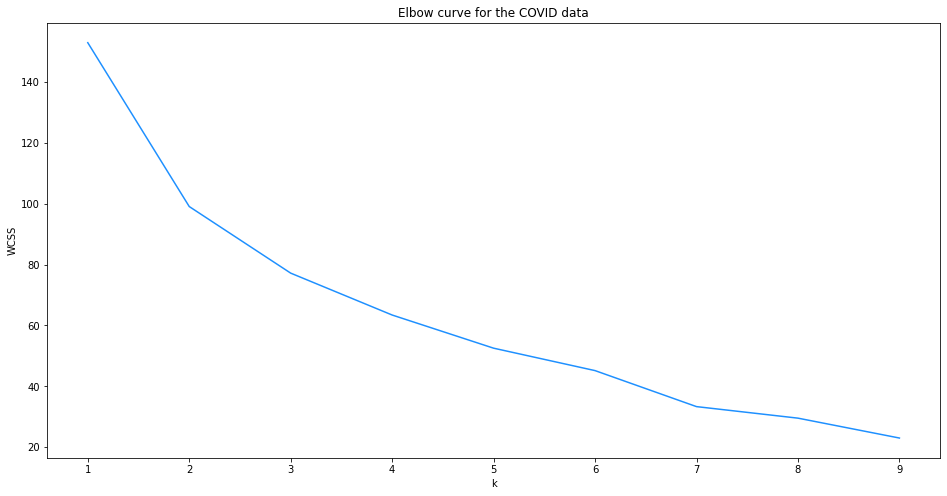

In [6]:
# Calculate the WCSS or inertia for different values of K.
WCSS = []
K = range(1,10)
for k in K:
    kmeans2 = KMeans(n_clusters=k)
    pipeline2 = make_pipeline(scaler,kmeans2)
    pipeline2.fit(covid_data)
    WCSS.append(kmeans2.inertia_)

# Plot the elbow curve. ('bx-')
plt.figure(figsize=(16,8))
plt.plot(K, WCSS,color='dodgerblue')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow curve for the COVID data')
plt.show()

The elbow curve suggests that a selection of K = 2 might be appropriate for this data as there is a kink in the curve at this point. However, you could also argue that a selection of K = 4 might be more appropriate because it results in a lower within cluster sum of squares (WCSS) and there is also a slight kink in the plot at this point.